In [17]:
# Get semantic model from example_basic.py
from example_basic import flights_sm
from IPython.display import Image

In [18]:
# Configuration: Choose backend for visualization
BACKEND = "altair"  # Options: "altair" or "plotly"

# Auto chart detection example: bar chart

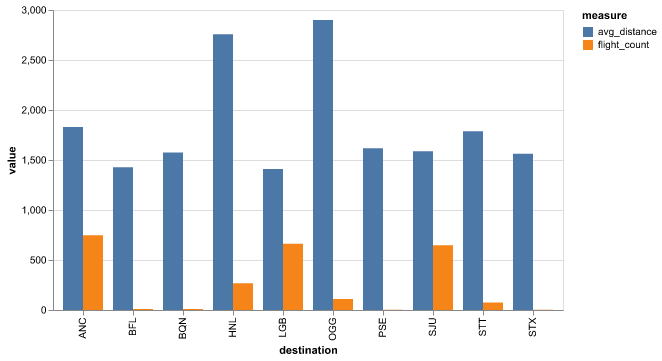

In [19]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["destination"],
        measures=["avg_distance", "flight_count"],
        order_by=[("avg_distance", "desc")],
        limit=10,
    ).chart(backend=BACKEND, format="png")
)

# Auto chart detection example: time-series

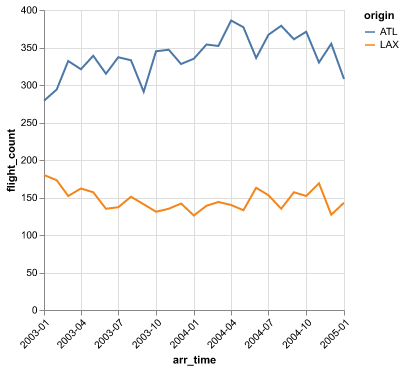

In [20]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["arr_time", "origin"],
        measures=["flight_count"],
        time_range={"start": "2003-01-01", "end": "2005-01-31"},
        time_grain="TIME_GRAIN_MONTH",
        filters=[lambda t: t.origin.isin(["ATL", "LAX"])],
    ).chart(backend=BACKEND, format="png")
)

# Auto chart detection example: heatmap

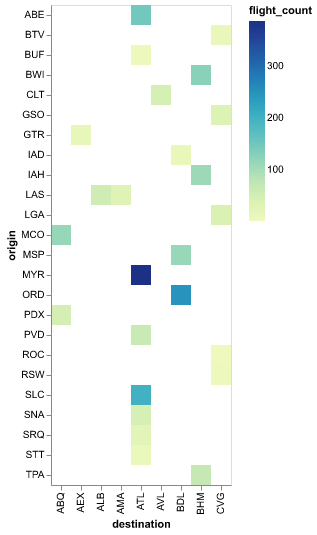

In [21]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.
Image(
    flights_sm.query(
        dimensions=["destination", "origin"], measures=["flight_count"], limit=25
    ).chart(backend=BACKEND, format="png")
)

# Only change the mark, keep auto-detection for the rest

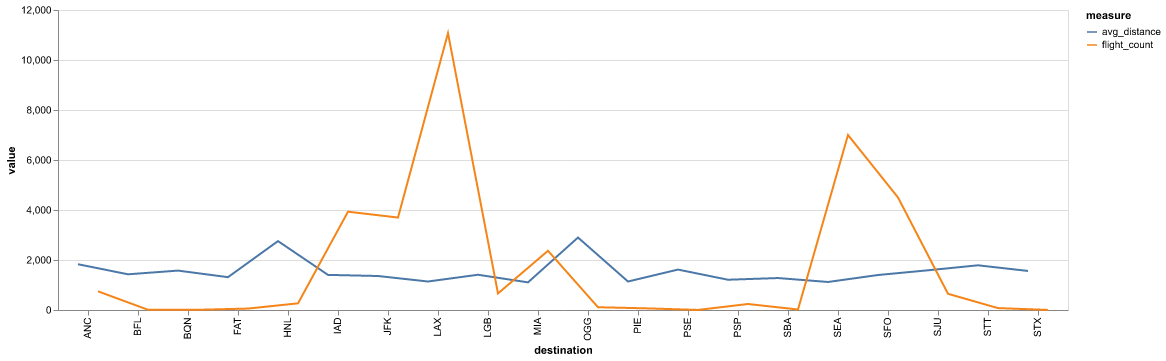

In [22]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.

# Conditional logic for different backends
if BACKEND == "altair":
    spec = {"mark": "line"}
else:  # plotly
    spec = {"chart_type": "line"}

Image(
    flights_sm.query(
        dimensions=["destination"],
        measures=["avg_distance", "flight_count"],
        order_by=[("avg_distance", "desc")],
        limit=20,
    ).chart(spec=spec, backend=BACKEND, format="png")
)

# Query with chart customization

In [ ]:
# note: We use Image to display image in Github.
# For regular usage, you can use .chart() and the result will be displayed in the notebook.

# Backend-specific chart customization
if BACKEND == "altair":
    spec = {
        "mark": "line",
        "encoding": {
            "x": {
                "field": "arr_time",
                "type": "ordinal",
                "axis": {
                    "labelExpr": "datum.label",
                    "labelOverlap": True,
                    "tickCount": 20,
                    "labelAngle": -45,
                },
            },
            "y": {"field": "flight_count", "type": "quantitative"},
            "color": {"field": "origin", "type": "nominal"},
        },
        "width": 500,
        "height": 300,
    }
else:  # plotly
    spec = {"layout": {"height": 600, "width": 600, "title": "Custom Chart Title"}}

Image(
    flights_sm.query(
        dimensions=["arr_time", "origin"],
        measures=["flight_count"],
        time_range={"start": "2003-01-01", "end": "2005-01-31"},
        time_grain="TIME_GRAIN_WEEK",
        filters=[lambda t: t.origin.isin(["ATL", "LAX"])],
    ).chart(spec=spec, backend=BACKEND, format="png")
)

# Output format in JSON - works with both backends

In [ ]:
# This option is great for passing the chart spec to a frontend (e.g. in an MCP server context).

json_spec = flights_sm.query(
    dimensions=["destination"],
    measures=["avg_distance"],
    order_by=[("avg_distance", "desc")],
    limit=20,
).chart(backend=BACKEND, format="json")
json_spec

In [ ]:
# If backend is plotly, use plotly.io.to_json to convert the figure to JSON
if BACKEND == "plotly":
    import plotly
    flights_sm.query(
        dimensions=["destination"],
        measures=["avg_distance"],
        order_by=[("avg_distance", "desc")],
        limit=20,
    ).chart(backend=BACKEND, format="json")
    fig = plotly.io.from_json(json_spec)
    fig.show()
